# 1 Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import datetime
import pytz
import IPython

In [ ]:
print('TF version:', tf.__version__)
print('GPU devices:', tf.config.list_physical_devices('GPU'))

TF version: 2.17.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!python -V

Python 3.10.12


# 2 Data load and preprocessing


In [ ]:
# download train_catvnoncat.h5
!gdown 'https://github.com/terrematte/deeplearning/raw/refs/heads/main/datasets/cats/train_catvnoncat.h5'

# download test_catvnoncat.h5
!gdown 'https://github.com/terrematte/deeplearning/raw/refs/heads/main/datasets/cats/test_catvnoncat.h5'

Downloading...
From: https://github.com/terrematte/deeplearning/raw/refs/heads/main/datasets/cats/train_catvnoncat.h5
To: /content/train_catvnoncat.h5
100% 2.57M/2.57M [00:00<00:00, 40.3MB/s]
Downloading...
From: https://github.com/terrematte/deeplearning/raw/refs/heads/main/datasets/cats/test_catvnoncat.h5
To: /content/test_catvnoncat.h5
100% 617k/617k [00:00<00:00, 22.0MB/s]


In [ ]:
def load_dataset():
    # load the train data
    train_dataset = h5py.File('train_catvnoncat.h5', "r")

    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])

    # your train set labels
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    # load the test data
    test_dataset = h5py.File('test_catvnoncat.h5', "r")

    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])

    # your test set labels
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    # the list of classes
    classes = np.array(test_dataset["list_classes"][:])

    # reshape the test data
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0],1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_y, test_set_x_orig, test_y, classes = load_dataset()

In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

# Standardize the dataset
train_x = train_set_x_flatten/255
test_x = test_set_x_flatten/255

In [ ]:
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x  shape: " + str(test_x.shape))
print ("test_y  shape: " + str(test_y.shape))

train_x shape: (209, 12288)
train_y shape: (209, 1)
test_x  shape: (50, 12288)
test_y  shape: (50, 1)


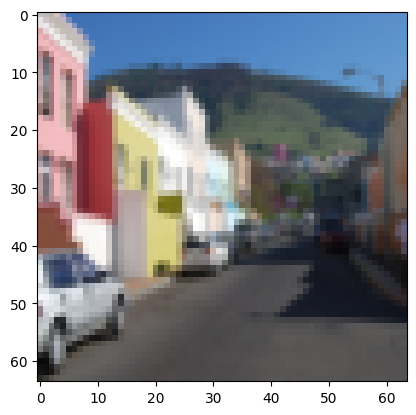

In [ ]:
# #not a cat image
index = 1
plt.imshow(train_x[index].reshape(64,64,3))

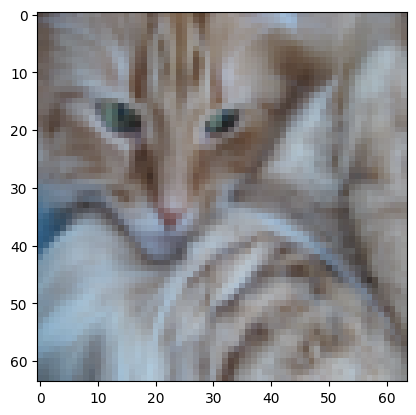

In [ ]:
# visualize a sample modified data
index = 2
plt.imshow(train_x[index].reshape(64,64,3))

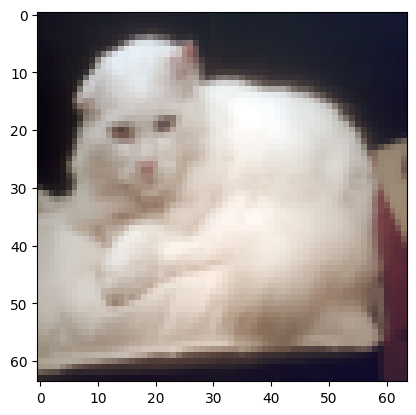

In [ ]:
# visualize a sample raw data
index = 13
plt.imshow(train_set_x_orig[index])

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))
    print('Duration: {:.2f} seconds'.format(time.time() - self.begins))

# 3 Base Model

In [ ]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=500,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=1)

Training: begins at Mon, 18 Sep 2023 10:06:21
Epoch 1/500
7/7 [==============================] - 7s 114ms/step - loss: 0.7070 - binary_accuracy: 0.4306 - val_loss: 0.7029 - val_binary_accuracy: 0.3600
Epoch 2/500
7/7 [==============================] - 0s 18ms/step - loss: 0.6906 - binary_accuracy: 0.5598 - val_loss: 0.7088 - val_binary_accuracy: 0.3200
Epoch 3/500
7/7 [==============================] - 0s 18ms/step - loss: 0.6874 - binary_accuracy: 0.5837 - val_loss: 0.7140 - val_binary_accuracy: 0.3400
Epoch 4/500
7/7 [==============================] - 0s 19ms/step - loss: 0.6841 - binary_accuracy: 0.5981 - val_loss: 0.7191 - val_binary_accuracy: 0.3600
Epoch 5/500
7/7 [==============================] - 0s 19ms/step - loss: 0.6819 - binary_accuracy: 0.6172 - val_loss: 0.7249 - val_binary_accuracy: 0.3400
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 0.6796 - binary_accuracy: 0.6364 - val_loss: 0.7300 - val_binary_accuracy: 0.3400
Epoch 7/500
7/7 [============

In [ ]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.4f - acc: %.4f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.4f - acc: %.4f' % (loss_, acc_))

7/7 [==============================] - 0s 4ms/step - loss: 0.2781 - binary_accuracy: 0.9282
Train loss: 0.2781 - acc: 0.9282
2/2 [==============================] - 0s 12ms/step - loss: 0.6222 - binary_accuracy: 0.7000
Test loss: 0.6222 - acc: 0.7000


# 4 Hyperparameter Tuning

Check the tutorials:

* https://docs.wandb.ai/tutorials/tensorflow_sweeps
* https://docs.wandb.ai/tutorials/tensorflow

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb

print('wandb version:', wandb.__version__)

wandb version: 0.15.10


In [ ]:
# pip install wandb --upgrade

In [ ]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## 4.1 Monitoring a neural network

In [ ]:
import wandb
from wandb.integration.keras import WandbMetricsLogger
from tensorflow.keras.callbacks import EarlyStopping

# Default values for hyperparameters
defaults = dict(layer_1 = 8,
                layer_2 = 8,
                learn_rate = 0.001,
                batch_size = 32,
                epoch = 500)

wandb.init(project="dl_week_wandb", config= defaults, name="dl_week_wandb_run_01")
config = wandb.config

wandb: Currently logged in as: terrematte. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230918_131140-cf7esqce
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dl_week06_run_01
wandb: ⭐️ View project at https://wandb.ai/terrematte/dl_week06
wandb: 🚀 View run at https://wandb.ai/terrematte/dl_week06/runs/cf7esqce


In [ ]:
config

{'layer_1': 8, 'layer_2': 8, 'learn_rate': 0.001, 'batch_size': 32, 'epoch': 500}

In [ ]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(config.layer_1, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(config.layer_2, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=config.learn_rate)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [ ]:
%%wandb
# Add WandbCallback() to the fit function
model.fit(x=train_x,
          y=train_y,
          batch_size=config.batch_size,
          epochs=config.epoch,
          validation_data=(test_x,test_y),
          callbacks=[WandbCallback(log_weights=True)],
          verbose=1)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
1/7 [===>..........................] - ETA: 5s - loss: 0.6891 - binary_accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 270ms/step - loss: 0.6683 - binary_accuracy: 0.6220 - val_loss: 0.7790 - val_binary_accuracy: 0.3400
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6588 - binary_accuracy: 0.6555 - val_loss: 0.8038 - val_binary_accuracy: 0.3400
Epoch 3/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6556 - binary_accuracy: 0.6603 - val_loss: 0.8104 - val_binary_accuracy: 0.3400
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6529 - binary_accuracy: 0.6603 - val_loss: 0.8138 - val_binary_accuracy: 0.3400
Epoch 5/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6507 - binary_accuracy: 0.6603 - val_loss: 0.8257 - val_binary_accuracy: 0.3400
Epoch 6/500
7/7 [==============================] - 0s 13ms/step - loss: 0.6489 - binary_accuracy: 0.6603 - val_loss: 0.8361 - val_binary_accuracy: 0.3400
Epoch 7/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6467 - binary

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 149ms/step - loss: 0.6274 - binary_accuracy: 0.6603 - val_loss: 0.7583 - val_binary_accuracy: 0.3200
Epoch 17/500
7/7 [==============================] - 0s 39ms/step - loss: 0.6271 - binary_accuracy: 0.6603 - val_loss: 0.7763 - val_binary_accuracy: 0.3400
Epoch 18/500
7/7 [==============================] - 0s 44ms/step - loss: 0.6229 - binary_accuracy: 0.6603 - val_loss: 0.7726 - val_binary_accuracy: 0.3400
Epoch 19/500
7/7 [==============================] - 0s 32ms/step - loss: 0.6205 - binary_accuracy: 0.6651 - val_loss: 0.7863 - val_binary_accuracy: 0.3400
Epoch 20/500
7/7 [==============================] - 0s 20ms/step - loss: 0.6216 - binary_accuracy: 0.6651 - val_loss: 0.7772 - val_binary_accuracy: 0.3400
Epoch 21/500
7/7 [==============================] - 0s 18ms/step - loss: 0.6143 - binary_accuracy: 0.6603 - val_loss: 0.7673 - val_binary_accuracy: 0.3200
Epoch 22/500
1/7 [===>..........................] - ETA: 0s - loss: 0.5775 - binar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 242ms/step - loss: 0.6126 - binary_accuracy: 0.6603 - val_loss: 0.7472 - val_binary_accuracy: 0.3400
Epoch 23/500
7/7 [==============================] - 0s 32ms/step - loss: 0.6095 - binary_accuracy: 0.6507 - val_loss: 0.7997 - val_binary_accuracy: 0.3400
Epoch 24/500
7/7 [==============================] - 0s 28ms/step - loss: 0.6081 - binary_accuracy: 0.6507 - val_loss: 0.8154 - val_binary_accuracy: 0.3400
Epoch 25/500
7/7 [==============================] - 0s 29ms/step - loss: 0.6135 - binary_accuracy: 0.6603 - val_loss: 0.7513 - val_binary_accuracy: 0.3400
Epoch 26/500
7/7 [==============================] - 0s 23ms/step - loss: 0.6011 - binary_accuracy: 0.6555 - val_loss: 0.7854 - val_binary_accuracy: 0.3400
Epoch 27/500
7/7 [==============================] - 0s 22ms/step - loss: 0.6017 - binary_accuracy: 0.6555 - val_loss: 0.7575 - val_binary_accuracy: 0.3400
Epoch 28/500
7/7 [==============================] - 0s 18ms/step - loss: 0.5983 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 253ms/step - loss: 0.5939 - binary_accuracy: 0.6603 - val_loss: 0.7253 - val_binary_accuracy: 0.4200
Epoch 32/500
7/7 [==============================] - 0s 25ms/step - loss: 0.5906 - binary_accuracy: 0.6555 - val_loss: 0.7710 - val_binary_accuracy: 0.3400
Epoch 33/500
7/7 [==============================] - 0s 18ms/step - loss: 0.5930 - binary_accuracy: 0.6746 - val_loss: 0.7435 - val_binary_accuracy: 0.4200
Epoch 34/500
7/7 [==============================] - 0s 30ms/step - loss: 0.5942 - binary_accuracy: 0.6746 - val_loss: 0.7831 - val_binary_accuracy: 0.3600
Epoch 35/500
7/7 [==============================] - 0s 71ms/step - loss: 0.5868 - binary_accuracy: 0.6699 - val_loss: 0.8456 - val_binary_accuracy: 0.3400
Epoch 36/500
7/7 [==============================] - 1s 80ms/step - loss: 0.5868 - binary_accuracy: 0.6555 - val_loss: 0.7520 - val_binary_accuracy: 0.3400
Epoch 37/500
7/7 [==============================] - 0s 73ms/step - loss: 0.5792 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 399ms/step - loss: 0.5752 - binary_accuracy: 0.6603 - val_loss: 0.7168 - val_binary_accuracy: 0.4000
Epoch 42/500
7/7 [==============================] - 0s 37ms/step - loss: 0.5787 - binary_accuracy: 0.6986 - val_loss: 0.7814 - val_binary_accuracy: 0.3400
Epoch 43/500
7/7 [==============================] - 0s 28ms/step - loss: 0.5698 - binary_accuracy: 0.6699 - val_loss: 0.7372 - val_binary_accuracy: 0.4200
Epoch 44/500
1/7 [===>..........................] - ETA: 0s - loss: 0.5999 - binary_accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 280ms/step - loss: 0.5719 - binary_accuracy: 0.6890 - val_loss: 0.7090 - val_binary_accuracy: 0.4400
Epoch 45/500
1/7 [===>..........................] - ETA: 0s - loss: 0.5753 - binary_accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 314ms/step - loss: 0.5656 - binary_accuracy: 0.6890 - val_loss: 0.6924 - val_binary_accuracy: 0.4800
Epoch 46/500
7/7 [==============================] - 0s 20ms/step - loss: 0.5688 - binary_accuracy: 0.7033 - val_loss: 0.7571 - val_binary_accuracy: 0.4200
Epoch 47/500
7/7 [==============================] - 0s 32ms/step - loss: 0.5647 - binary_accuracy: 0.7033 - val_loss: 0.7311 - val_binary_accuracy: 0.4000
Epoch 48/500
1/7 [===>..........................] - ETA: 0s - loss: 0.5079 - binary_accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 244ms/step - loss: 0.5632 - binary_accuracy: 0.7033 - val_loss: 0.6815 - val_binary_accuracy: 0.5000
Epoch 49/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5606 - binary_accuracy: 0.7129 - val_loss: 0.7460 - val_binary_accuracy: 0.4200
Epoch 50/500
6/7 [========================>.....] - ETA: 0s - loss: 0.5544 - binary_accuracy: 0.6927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 255ms/step - loss: 0.5623 - binary_accuracy: 0.6842 - val_loss: 0.6751 - val_binary_accuracy: 0.5600
Epoch 51/500
7/7 [==============================] - 0s 30ms/step - loss: 0.5665 - binary_accuracy: 0.7273 - val_loss: 0.7651 - val_binary_accuracy: 0.4200
Epoch 52/500
7/7 [==============================] - 0s 37ms/step - loss: 0.5550 - binary_accuracy: 0.7081 - val_loss: 0.7818 - val_binary_accuracy: 0.4200
Epoch 53/500
7/7 [==============================] - 0s 23ms/step - loss: 0.5578 - binary_accuracy: 0.7081 - val_loss: 0.7354 - val_binary_accuracy: 0.4000
Epoch 54/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5537 - binary_accuracy: 0.7081 - val_loss: 0.7757 - val_binary_accuracy: 0.4200
Epoch 55/500
7/7 [==============================] - 0s 33ms/step - loss: 0.5533 - binary_accuracy: 0.7129 - val_loss: 0.7263 - val_binary_accuracy: 0.4000
Epoch 56/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5520 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 314ms/step - loss: 0.5278 - binary_accuracy: 0.7560 - val_loss: 0.6743 - val_binary_accuracy: 0.6000
Epoch 75/500
7/7 [==============================] - 0s 20ms/step - loss: 0.5238 - binary_accuracy: 0.7656 - val_loss: 0.7088 - val_binary_accuracy: 0.5400
Epoch 76/500
7/7 [==============================] - 0s 27ms/step - loss: 0.5229 - binary_accuracy: 0.7464 - val_loss: 0.7413 - val_binary_accuracy: 0.4600
Epoch 77/500
7/7 [==============================] - 0s 31ms/step - loss: 0.5211 - binary_accuracy: 0.7512 - val_loss: 0.6901 - val_binary_accuracy: 0.5800
Epoch 78/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5199 - binary_accuracy: 0.7416 - val_loss: 0.6831 - val_binary_accuracy: 0.5600
Epoch 79/500
6/7 [========================>.....] - ETA: 0s - loss: 0.5083 - binary_accuracy: 0.7656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 333ms/step - loss: 0.5199 - binary_accuracy: 0.7512 - val_loss: 0.6479 - val_binary_accuracy: 0.6200
Epoch 80/500
7/7 [==============================] - 0s 16ms/step - loss: 0.5193 - binary_accuracy: 0.7895 - val_loss: 0.7259 - val_binary_accuracy: 0.5200
Epoch 81/500
7/7 [==============================] - 0s 25ms/step - loss: 0.5202 - binary_accuracy: 0.7464 - val_loss: 0.7304 - val_binary_accuracy: 0.5000
Epoch 82/500
7/7 [==============================] - 0s 26ms/step - loss: 0.5210 - binary_accuracy: 0.7321 - val_loss: 0.6527 - val_binary_accuracy: 0.6400
Epoch 83/500
6/7 [========================>.....] - ETA: 0s - loss: 0.5038 - binary_accuracy: 0.7865

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 225ms/step - loss: 0.5145 - binary_accuracy: 0.7608 - val_loss: 0.6283 - val_binary_accuracy: 0.6400
Epoch 84/500
7/7 [==============================] - 0s 18ms/step - loss: 0.5160 - binary_accuracy: 0.7990 - val_loss: 0.6783 - val_binary_accuracy: 0.5800
Epoch 85/500
7/7 [==============================] - 0s 26ms/step - loss: 0.5098 - binary_accuracy: 0.7751 - val_loss: 0.6868 - val_binary_accuracy: 0.5600
Epoch 86/500
7/7 [==============================] - 0s 24ms/step - loss: 0.5113 - binary_accuracy: 0.7703 - val_loss: 0.6770 - val_binary_accuracy: 0.6000
Epoch 87/500
7/7 [==============================] - 0s 23ms/step - loss: 0.5064 - binary_accuracy: 0.7799 - val_loss: 0.7204 - val_binary_accuracy: 0.5400
Epoch 88/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5057 - binary_accuracy: 0.7656 - val_loss: 0.7491 - val_binary_accuracy: 0.4800
Epoch 89/500
7/7 [==============================] - 0s 34ms/step - loss: 0.5103 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 229ms/step - loss: 0.4854 - binary_accuracy: 0.7943 - val_loss: 0.6046 - val_binary_accuracy: 0.7000
Epoch 107/500
7/7 [==============================] - 0s 18ms/step - loss: 0.4883 - binary_accuracy: 0.8230 - val_loss: 0.6395 - val_binary_accuracy: 0.6400
Epoch 108/500
7/7 [==============================] - 0s 18ms/step - loss: 0.4871 - binary_accuracy: 0.8086 - val_loss: 0.6770 - val_binary_accuracy: 0.6200
Epoch 109/500
7/7 [==============================] - 0s 18ms/step - loss: 0.4826 - binary_accuracy: 0.8134 - val_loss: 0.6565 - val_binary_accuracy: 0.6200
Epoch 110/500
7/7 [==============================] - 0s 18ms/step - loss: 0.4814 - binary_accuracy: 0.8086 - val_loss: 0.6489 - val_binary_accuracy: 0.6200
Epoch 111/500
7/7 [==============================] - 0s 16ms/step - loss: 0.4833 - binary_accuracy: 0.8086 - val_loss: 0.6761 - val_binary_accuracy: 0.6200
Epoch 112/500
7/7 [==============================] - 0s 17ms/step - loss: 0.4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 154ms/step - loss: 0.4472 - binary_accuracy: 0.8278 - val_loss: 0.5826 - val_binary_accuracy: 0.7200
Epoch 139/500
7/7 [==============================] - 0s 14ms/step - loss: 0.4512 - binary_accuracy: 0.8278 - val_loss: 0.6706 - val_binary_accuracy: 0.6400
Epoch 140/500
7/7 [==============================] - 0s 14ms/step - loss: 0.4440 - binary_accuracy: 0.8230 - val_loss: 0.6337 - val_binary_accuracy: 0.6400
Epoch 141/500
7/7 [==============================] - 0s 11ms/step - loss: 0.4415 - binary_accuracy: 0.8325 - val_loss: 0.6475 - val_binary_accuracy: 0.6200
Epoch 142/500
7/7 [==============================] - 0s 14ms/step - loss: 0.4405 - binary_accuracy: 0.8325 - val_loss: 0.6481 - val_binary_accuracy: 0.6200
Epoch 143/500
7/7 [==============================] - 0s 15ms/step - loss: 0.4418 - binary_accuracy: 0.8278 - val_loss: 0.6635 - val_binary_accuracy: 0.6400
Epoch 144/500
7/7 [==============================] - 0s 11ms/step - loss: 0.4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 200ms/step - loss: 0.4043 - binary_accuracy: 0.8325 - val_loss: 0.5395 - val_binary_accuracy: 0.7600
Epoch 178/500
7/7 [==============================] - 0s 14ms/step - loss: 0.4107 - binary_accuracy: 0.8804 - val_loss: 0.6364 - val_binary_accuracy: 0.6600
Epoch 179/500
7/7 [==============================] - 0s 11ms/step - loss: 0.4012 - binary_accuracy: 0.8852 - val_loss: 0.6297 - val_binary_accuracy: 0.6600
Epoch 180/500
7/7 [==============================] - 0s 12ms/step - loss: 0.3963 - binary_accuracy: 0.8852 - val_loss: 0.5879 - val_binary_accuracy: 0.6600
Epoch 181/500
7/7 [==============================] - 0s 13ms/step - loss: 0.3991 - binary_accuracy: 0.8756 - val_loss: 0.6654 - val_binary_accuracy: 0.6400
Epoch 182/500
7/7 [==============================] - 0s 12ms/step - loss: 0.3960 - binary_accuracy: 0.8708 - val_loss: 0.6476 - val_binary_accuracy: 0.6600
Epoch 183/500
7/7 [==============================] - 0s 12ms/step - loss: 0.3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131140-cf7esqce/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 167ms/step - loss: 0.3702 - binary_accuracy: 0.8804 - val_loss: 0.5291 - val_binary_accuracy: 0.8000
Epoch 214/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3640 - binary_accuracy: 0.8947 - val_loss: 0.6733 - val_binary_accuracy: 0.6600
Epoch 215/500
7/7 [==============================] - 0s 15ms/step - loss: 0.3574 - binary_accuracy: 0.9187 - val_loss: 0.6326 - val_binary_accuracy: 0.6600
Epoch 216/500
7/7 [==============================] - 0s 16ms/step - loss: 0.3605 - binary_accuracy: 0.9139 - val_loss: 0.7204 - val_binary_accuracy: 0.6000
Epoch 217/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3571 - binary_accuracy: 0.8852 - val_loss: 0.5917 - val_binary_accuracy: 0.6800
Epoch 218/500
7/7 [==============================] - 0s 16ms/step - loss: 0.3571 - binary_accuracy: 0.9091 - val_loss: 0.5669 - val_binary_accuracy: 0.6800
Epoch 219/500
7/7 [==============================] - 0s 18ms/step - loss: 0.3

In [ ]:
wandb.finish() # Let wandb know you're finished!

wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:     binary_accuracy ▁▁▁▂▂▃▄▄▄▄▄▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇████▇████████
wandb:               epoch ▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                loss ██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
wandb: val_binary_accuracy ▁▁▁▁▃▅▅▆▆▇▆▇▆▇▇▇▇▇▇█▇▇▇▇▇▇█▇▇█▇▇████▇▆█▇
wandb:            val_loss █▆▇▇▇▄▅▄▃▂▄▂▅▂▁▃▄▂▄▁▂▅▃▃▃▂▄▁▁▁▅▃▁▂▃▃▆█▄█
wandb: 
wandb: Run summary:
wandb:          best_epoch 212
wandb:       best_val_loss 0.52907
wandb:     binary_accuracy 0.99043
wandb:               epoch 499
wandb:                loss 0.13382
wandb: val_binary_accuracy 0.7
wandb:            val_loss 0.72438
wandb: 
wandb: 🚀 View run dl_week06_run_01 at: https://wandb.ai/terrematte/dl_week06/runs/cf7esqce
wandb: Synced 5 W&B file(s), 1 media file(s), 80 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20230918_131140-cf7esqce/logs


## 4.2 Sweeps

In [ ]:
 # The sweep calls this function with each set of hyperparameters
def train():
    # Default values for hyper-parameters we're going to sweep over
    defaults = dict(layer_1 = 8,
                layer_2 = 8,
                learn_rate = 0.001,
                batch_size = 32,
                epoch = 500)

    # Initialize a new wandb run
    wandb.init(project="dl_week06", config= defaults)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    # Instantiate a simple classification model
    model = tf.keras.Sequential([
                                 tf.keras.layers.Dense(config.layer_1, activation=tf.nn.relu, dtype='float64'),
                                 tf.keras.layers.Dense(config.layer_2, activation=tf.nn.relu, dtype='float64'),
                                 tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
                                 ])

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # Instantiate an optimizer.
    optimizer = tf.keras.optimizers.SGD(learning_rate=config.learn_rate)

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback(),
                          EarlyStopping(patience=100)]
              )

In [ ]:
# See the source code in order to see other parameters
# https://github.com/wandb/client/tree/master/wandb/sweeps

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'layer_1': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'layer_2': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'learn_rate': {
            'min': -4,
            'max': -2,
            'distribution': 'log_uniform',
        },
        'epoch': {
            'values': [300,400,600]
        },
        'batch_size': {
            'values': [32,64]
        }
    }
}

In [ ]:
# Initialize a new sweep
# Arguments:
#     – sweep_config: the sweep config dictionary defined above
#     – entity: Set the username for the sweep
#     – project: Set the project name for the sweep
sweep_id = wandb.sweep(sweep_config, entity="terrematte", project="dl_week06")

wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. learn_rate uses log_uniform, where min/max specify base-e exponents. Use log_uniform_values to specify limit values.


Create sweep with ID: 5z67asm0
Sweep URL: https://wandb.ai/terrematte/dl_week06/sweeps/5z67asm0


In [ ]:
# Initialize a new sweep
# Arguments:
#     – sweep_id: the sweep_id to run - this was returned above by wandb.sweep()
#     – function: function that defines your model architecture and trains it
wandb.agent(sweep_id = sweep_id, function=train,count=20)

wandb: Agent Starting Run: 5viskuul with config:
wandb: 	batch_size: 64
wandb: 	epoch: 400
wandb: 	layer_1: 8
wandb: 	layer_2: 27
wandb: 	learn_rate: 0.04798086029863364
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230918_131414-5viskuul
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run glorious-sweep-1
wandb: ⭐️ View project at https://wandb.ai/terrematte/dl_week06
wandb: 🧹 View sweep at https://wandb.ai/terrematte/dl_week06/sweeps/5z67asm0
wandb: 🚀 View run at https://wandb.ai/terrematte/dl_week06/runs/5viskuul


Epoch 1/400
1/4 [======>.......................] - ETA: 2s - loss: 0.7375 - binary_accuracy: 0.3125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 337ms/step - loss: 0.6872 - binary_accuracy: 0.5311 - val_loss: 1.3190 - val_binary_accuracy: 0.3400
Epoch 2/400
4/4 [==============================] - 0s 29ms/step - loss: 0.6677 - binary_accuracy: 0.6555 - val_loss: 1.4427 - val_binary_accuracy: 0.3400
Epoch 3/400
1/4 [======>.......................] - ETA: 0s - loss: 0.7722 - binary_accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 399ms/step - loss: 0.6974 - binary_accuracy: 0.6555 - val_loss: 0.6982 - val_binary_accuracy: 0.3400
Epoch 4/400
4/4 [==============================] - 0s 25ms/step - loss: 0.6671 - binary_accuracy: 0.6555 - val_loss: 0.8948 - val_binary_accuracy: 0.3400
Epoch 5/400
4/4 [==============================] - 0s 22ms/step - loss: 0.6369 - binary_accuracy: 0.6555 - val_loss: 0.8366 - val_binary_accuracy: 0.3400
Epoch 6/400
4/4 [==============================] - 0s 23ms/step - loss: 0.6361 - binary_accuracy: 0.6555 - val_loss: 0.7148 - val_binary_accuracy: 0.3400
Epoch 7/400
4/4 [==============================] - 0s 28ms/step - loss: 0.6281 - binary_accuracy: 0.6651 - val_loss: 1.1820 - val_binary_accuracy: 0.3400
Epoch 8/400
4/4 [==============================] - 0s 21ms/step - loss: 0.6524 - binary_accuracy: 0.6555 - val_loss: 0.7545 - val_binary_accuracy: 0.3400
Epoch 9/400
4/4 [==============================] - 0s 24ms/step - loss: 0.6286 - binary

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 568ms/step - loss: 0.5846 - binary_accuracy: 0.6555 - val_loss: 0.6886 - val_binary_accuracy: 0.4200
Epoch 15/400
4/4 [==============================] - 0s 16ms/step - loss: 0.6330 - binary_accuracy: 0.6364 - val_loss: 0.8801 - val_binary_accuracy: 0.3400
Epoch 16/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6003 - binary_accuracy: 0.6555 - val_loss: 0.7144 - val_binary_accuracy: 0.3400
Epoch 17/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6686 - binary_accuracy: 0.6603 - val_loss: 0.7211 - val_binary_accuracy: 0.3400
Epoch 18/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6492 - binary_accuracy: 0.6603 - val_loss: 0.7096 - val_binary_accuracy: 0.3400
Epoch 19/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5961 - binary_accuracy: 0.6603 - val_loss: 0.7162 - val_binary_accuracy: 0.3400
Epoch 20/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5704 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 295ms/step - loss: 0.5272 - binary_accuracy: 0.6651 - val_loss: 0.6800 - val_binary_accuracy: 0.4800
Epoch 44/400
4/4 [==============================] - 0s 19ms/step - loss: 0.5592 - binary_accuracy: 0.6699 - val_loss: 0.7282 - val_binary_accuracy: 0.3400
Epoch 45/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5329 - binary_accuracy: 0.6746 - val_loss: 0.7112 - val_binary_accuracy: 0.4000
Epoch 46/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5113 - binary_accuracy: 0.6794 - val_loss: 0.6840 - val_binary_accuracy: 0.4200
Epoch 47/400
4/4 [==============================] - 0s 15ms/step - loss: 0.4927 - binary_accuracy: 0.7081 - val_loss: 1.4379 - val_binary_accuracy: 0.3400
Epoch 48/400
1/4 [======>.......................] - ETA: 0s - loss: 0.7142 - binary_accuracy: 0.6406

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 285ms/step - loss: 0.6489 - binary_accuracy: 0.6890 - val_loss: 0.6632 - val_binary_accuracy: 0.5400
Epoch 49/400
1/4 [======>.......................] - ETA: 0s - loss: 0.6023 - binary_accuracy: 0.7031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 326ms/step - loss: 0.5642 - binary_accuracy: 0.6986 - val_loss: 0.6289 - val_binary_accuracy: 0.6200
Epoch 50/400
1/4 [======>.......................] - ETA: 0s - loss: 0.5909 - binary_accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 285ms/step - loss: 0.5808 - binary_accuracy: 0.7129 - val_loss: 0.5344 - val_binary_accuracy: 0.7400
Epoch 51/400
1/4 [======>.......................] - ETA: 0s - loss: 0.5323 - binary_accuracy: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 318ms/step - loss: 0.5097 - binary_accuracy: 0.6794 - val_loss: 0.5237 - val_binary_accuracy: 0.7400
Epoch 52/400
4/4 [==============================] - 0s 29ms/step - loss: 0.5872 - binary_accuracy: 0.6699 - val_loss: 0.7690 - val_binary_accuracy: 0.5000
Epoch 53/400
4/4 [==============================] - 0s 33ms/step - loss: 0.5500 - binary_accuracy: 0.6938 - val_loss: 0.7475 - val_binary_accuracy: 0.3400
Epoch 54/400
4/4 [==============================] - 0s 36ms/step - loss: 0.6139 - binary_accuracy: 0.6555 - val_loss: 0.7305 - val_binary_accuracy: 0.3400
Epoch 55/400
4/4 [==============================] - 0s 44ms/step - loss: 0.5531 - binary_accuracy: 0.6555 - val_loss: 0.7991 - val_binary_accuracy: 0.3400
Epoch 56/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5181 - binary_accuracy: 0.6603 - val_loss: 0.7240 - val_binary_accuracy: 0.3400
Epoch 57/400
4/4 [==============================] - 0s 30ms/step - loss: 0.5198 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131414-5viskuul/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 584ms/step - loss: 0.4683 - binary_accuracy: 0.7416 - val_loss: 0.4886 - val_binary_accuracy: 0.7200
Epoch 111/400
4/4 [==============================] - 0s 17ms/step - loss: 0.3854 - binary_accuracy: 0.7560 - val_loss: 1.4600 - val_binary_accuracy: 0.4200
Epoch 112/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6178 - binary_accuracy: 0.7129 - val_loss: 0.6459 - val_binary_accuracy: 0.5600
Epoch 113/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5565 - binary_accuracy: 0.7368 - val_loss: 0.6311 - val_binary_accuracy: 0.5600
Epoch 114/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5082 - binary_accuracy: 0.7703 - val_loss: 0.5166 - val_binary_accuracy: 0.7400
Epoch 115/400
4/4 [==============================] - 0s 18ms/step - loss: 0.5620 - binary_accuracy: 0.6172 - val_loss: 0.8324 - val_binary_accuracy: 0.3600
Epoch 116/400
4/4 [==============================] - 0s 16ms/step - loss: 0.4

wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:     binary_accuracy ▃▃▃▃▃▃▃▃▃▄▃▄▅▅▄▅▄▄▅▄▄▅▅▄▄▅▄▅▅▇▄▂▆▄▆▁▆▇▇█
wandb:               epoch ▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                loss ██▇█▇▇▇▆▆▇▇▆▅▄▅▄▅▅▆▇▅▆▄▆▄▇▇▄▄▂▇▆▃▃▃▇▄▂▂▁
wandb: val_binary_accuracy ▁▁▁▁▁▂▁▁▁▇▁▂▆▁▂▃▂▁▆▂▄▇▂▃▃▄▃▃▅▅▆█▆▅█▄▄▆█▆
wandb:            val_loss ▆▂▂▂▂▂▂▇▂▁▂▅▁█▂▃▂▄▁▂▂▁▆▂▃▁▃▄▂▄▃▂▂▄▂▃█▂▂▅
wandb: 
wandb: Run summary:
wandb:          best_epoch 109
wandb:       best_val_loss 0.4886
wandb:     binary_accuracy 0.91388
wandb:               epoch 209
wandb:                loss 0.19923
wandb: val_binary_accuracy 0.66
wandb:            val_loss 1.32968
wandb: 
wandb: 🚀 View run glorious-sweep-1 at: https://wandb.ai/terrematte/dl_week06/runs/5viskuul
wandb: Synced 5 W&B file(s), 1 media file(s), 45 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20230918_131414-5viskuul/logs
wandb: Agent Starting Run: qrwyz9in with config:
wandb: 	batch_size:

Epoch 1/400
1/7 [===>..........................] - ETA: 4s - loss: 0.7278 - binary_accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 173ms/step - loss: 0.7281 - binary_accuracy: 0.6220 - val_loss: 0.7199 - val_binary_accuracy: 0.3400
Epoch 2/400
7/7 [==============================] - 0s 15ms/step - loss: 0.6644 - binary_accuracy: 0.6507 - val_loss: 0.7363 - val_binary_accuracy: 0.3400
Epoch 3/400
7/7 [==============================] - 0s 22ms/step - loss: 0.6531 - binary_accuracy: 0.6555 - val_loss: 0.8900 - val_binary_accuracy: 0.3400
Epoch 4/400
7/7 [==============================] - 0s 20ms/step - loss: 0.6517 - binary_accuracy: 0.6555 - val_loss: 0.8327 - val_binary_accuracy: 0.3400
Epoch 5/400
7/7 [==============================] - 0s 20ms/step - loss: 0.6285 - binary_accuracy: 0.6555 - val_loss: 0.9087 - val_binary_accuracy: 0.3400
Epoch 6/400
7/7 [==============================] - 0s 16ms/step - loss: 0.6318 - binary_accuracy: 0.6555 - val_loss: 0.7578 - val_binary_accuracy: 0.3400
Epoch 7/400
7/7 [==============================] - 0s 15ms/step - loss: 0.6295 - binary

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 201ms/step - loss: 0.6041 - binary_accuracy: 0.6555 - val_loss: 0.7190 - val_binary_accuracy: 0.3600
Epoch 13/400
7/7 [==============================] - 0s 45ms/step - loss: 0.6083 - binary_accuracy: 0.6555 - val_loss: 0.9362 - val_binary_accuracy: 0.3400
Epoch 14/400
7/7 [==============================] - 0s 28ms/step - loss: 0.6139 - binary_accuracy: 0.6746 - val_loss: 0.7792 - val_binary_accuracy: 0.3400
Epoch 15/400
7/7 [==============================] - 0s 17ms/step - loss: 0.5963 - binary_accuracy: 0.6459 - val_loss: 0.9172 - val_binary_accuracy: 0.3400
Epoch 16/400
7/7 [==============================] - 0s 16ms/step - loss: 0.5844 - binary_accuracy: 0.6555 - val_loss: 1.4478 - val_binary_accuracy: 0.3400
Epoch 17/400
7/7 [==============================] - 0s 16ms/step - loss: 0.6167 - binary_accuracy: 0.6603 - val_loss: 0.7614 - val_binary_accuracy: 0.3400
Epoch 18/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5500 - binar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 160ms/step - loss: 0.5717 - binary_accuracy: 0.6603 - val_loss: 0.6867 - val_binary_accuracy: 0.3400
Epoch 19/400
7/7 [==============================] - 0s 14ms/step - loss: 0.5449 - binary_accuracy: 0.6603 - val_loss: 1.4991 - val_binary_accuracy: 0.3400
Epoch 20/400
1/7 [===>..........................] - ETA: 0s - loss: 0.4350 - binary_accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 188ms/step - loss: 0.5318 - binary_accuracy: 0.6411 - val_loss: 0.6801 - val_binary_accuracy: 0.3400
Epoch 21/400
7/7 [==============================] - 0s 11ms/step - loss: 0.5842 - binary_accuracy: 0.6603 - val_loss: 0.6951 - val_binary_accuracy: 0.3600
Epoch 22/400
7/7 [==============================] - 0s 11ms/step - loss: 0.5593 - binary_accuracy: 0.6411 - val_loss: 0.7233 - val_binary_accuracy: 0.3400
Epoch 23/400
7/7 [==============================] - 0s 11ms/step - loss: 0.5451 - binary_accuracy: 0.6555 - val_loss: 0.7474 - val_binary_accuracy: 0.3400
Epoch 24/400
7/7 [==============================] - 0s 13ms/step - loss: 0.5145 - binary_accuracy: 0.6746 - val_loss: 0.8818 - val_binary_accuracy: 0.3600
Epoch 25/400
7/7 [==============================] - 0s 11ms/step - loss: 0.5142 - binary_accuracy: 0.6555 - val_loss: 1.1885 - val_binary_accuracy: 0.3600
Epoch 26/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5118 - binar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 151ms/step - loss: 0.5647 - binary_accuracy: 0.6746 - val_loss: 0.6764 - val_binary_accuracy: 0.3400
Epoch 27/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5918 - binary_accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 156ms/step - loss: 0.6082 - binary_accuracy: 0.6172 - val_loss: 0.6722 - val_binary_accuracy: 0.3400
Epoch 28/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5536 - binary_accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 168ms/step - loss: 0.5308 - binary_accuracy: 0.6794 - val_loss: 0.6720 - val_binary_accuracy: 0.5400
Epoch 29/400
7/7 [==============================] - 0s 12ms/step - loss: 0.4888 - binary_accuracy: 0.7033 - val_loss: 0.8943 - val_binary_accuracy: 0.5400
Epoch 30/400
7/7 [==============================] - 0s 12ms/step - loss: 0.6009 - binary_accuracy: 0.6220 - val_loss: 0.6761 - val_binary_accuracy: 0.3800
Epoch 31/400
7/7 [==============================] - 0s 14ms/step - loss: 0.5674 - binary_accuracy: 0.6890 - val_loss: 0.7891 - val_binary_accuracy: 0.5200
Epoch 32/400
1/7 [===>..........................] - ETA: 0s - loss: 0.6448 - binary_accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 153ms/step - loss: 0.5312 - binary_accuracy: 0.6507 - val_loss: 0.6682 - val_binary_accuracy: 0.6800
Epoch 33/400
7/7 [==============================] - 0s 12ms/step - loss: 0.5570 - binary_accuracy: 0.6651 - val_loss: 0.7096 - val_binary_accuracy: 0.5400
Epoch 34/400
7/7 [==============================] - 0s 13ms/step - loss: 0.4806 - binary_accuracy: 0.7273 - val_loss: 1.4974 - val_binary_accuracy: 0.3400
Epoch 35/400
7/7 [==============================] - 0s 10ms/step - loss: 0.5695 - binary_accuracy: 0.6603 - val_loss: 1.7036 - val_binary_accuracy: 0.3400
Epoch 36/400
1/7 [===>..........................] - ETA: 0s - loss: 0.7069 - binary_accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 157ms/step - loss: 0.5950 - binary_accuracy: 0.6555 - val_loss: 0.6541 - val_binary_accuracy: 0.7000
Epoch 37/400
7/7 [==============================] - 0s 13ms/step - loss: 0.5628 - binary_accuracy: 0.6794 - val_loss: 0.7257 - val_binary_accuracy: 0.5400
Epoch 38/400
7/7 [==============================] - 0s 12ms/step - loss: 0.5410 - binary_accuracy: 0.6842 - val_loss: 0.9313 - val_binary_accuracy: 0.3800
Epoch 39/400
7/7 [==============================] - 0s 11ms/step - loss: 0.5146 - binary_accuracy: 0.7033 - val_loss: 1.1579 - val_binary_accuracy: 0.3400
Epoch 40/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5646 - binary_accuracy: 0.6250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 153ms/step - loss: 0.5163 - binary_accuracy: 0.6938 - val_loss: 0.6227 - val_binary_accuracy: 0.7200
Epoch 41/400
7/7 [==============================] - 0s 13ms/step - loss: 0.5861 - binary_accuracy: 0.6459 - val_loss: 0.7009 - val_binary_accuracy: 0.4000
Epoch 42/400
7/7 [==============================] - 0s 11ms/step - loss: 0.4879 - binary_accuracy: 0.7273 - val_loss: 0.6402 - val_binary_accuracy: 0.6600
Epoch 43/400
1/7 [===>..........................] - ETA: 0s - loss: 0.4124 - binary_accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 161ms/step - loss: 0.4843 - binary_accuracy: 0.7368 - val_loss: 0.6087 - val_binary_accuracy: 0.7800
Epoch 44/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5295 - binary_accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 308ms/step - loss: 0.5108 - binary_accuracy: 0.7464 - val_loss: 0.5834 - val_binary_accuracy: 0.6800
Epoch 45/400
7/7 [==============================] - 0s 13ms/step - loss: 0.5841 - binary_accuracy: 0.6459 - val_loss: 0.7035 - val_binary_accuracy: 0.4200
Epoch 46/400
7/7 [==============================] - 0s 15ms/step - loss: 0.4747 - binary_accuracy: 0.7368 - val_loss: 0.8140 - val_binary_accuracy: 0.6200
Epoch 47/400
7/7 [==============================] - 0s 14ms/step - loss: 0.5160 - binary_accuracy: 0.6842 - val_loss: 0.6261 - val_binary_accuracy: 0.6800
Epoch 48/400
7/7 [==============================] - 0s 14ms/step - loss: 0.4476 - binary_accuracy: 0.7464 - val_loss: 0.5999 - val_binary_accuracy: 0.8200
Epoch 49/400
7/7 [==============================] - 0s 16ms/step - loss: 0.4147 - binary_accuracy: 0.8182 - val_loss: 1.7219 - val_binary_accuracy: 0.3400
Epoch 50/400
7/7 [==============================] - 0s 15ms/step - loss: 0.5567 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 176ms/step - loss: 0.3908 - binary_accuracy: 0.8278 - val_loss: 0.5760 - val_binary_accuracy: 0.7800
Epoch 58/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5547 - binary_accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 167ms/step - loss: 0.3893 - binary_accuracy: 0.8134 - val_loss: 0.5164 - val_binary_accuracy: 0.7800
Epoch 59/400
7/7 [==============================] - 0s 11ms/step - loss: 0.3635 - binary_accuracy: 0.8086 - val_loss: 3.1708 - val_binary_accuracy: 0.3400
Epoch 60/400
7/7 [==============================] - 0s 13ms/step - loss: 0.6070 - binary_accuracy: 0.7273 - val_loss: 0.5617 - val_binary_accuracy: 0.7800
Epoch 61/400
7/7 [==============================] - 0s 13ms/step - loss: 0.4992 - binary_accuracy: 0.7560 - val_loss: 0.8018 - val_binary_accuracy: 0.3800
Epoch 62/400
7/7 [==============================] - 0s 13ms/step - loss: 0.3909 - binary_accuracy: 0.8038 - val_loss: 2.2950 - val_binary_accuracy: 0.3400
Epoch 63/400
7/7 [==============================] - 0s 14ms/step - loss: 0.6516 - binary_accuracy: 0.7273 - val_loss: 0.8350 - val_binary_accuracy: 0.4200
Epoch 64/400
7/7 [==============================] - 0s 11ms/step - loss: 0.3845 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 263ms/step - loss: 0.3604 - binary_accuracy: 0.8182 - val_loss: 0.5096 - val_binary_accuracy: 0.8400
Epoch 99/400
7/7 [==============================] - 0s 20ms/step - loss: 0.5375 - binary_accuracy: 0.8278 - val_loss: 0.5478 - val_binary_accuracy: 0.7400
Epoch 100/400
1/7 [===>..........................] - ETA: 0s - loss: 0.5619 - binary_accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131545-qrwyz9in/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 306ms/step - loss: 0.4237 - binary_accuracy: 0.7847 - val_loss: 0.4972 - val_binary_accuracy: 0.8000
Epoch 101/400
7/7 [==============================] - 0s 27ms/step - loss: 0.2937 - binary_accuracy: 0.8469 - val_loss: 1.1105 - val_binary_accuracy: 0.5000
Epoch 102/400
7/7 [==============================] - 0s 31ms/step - loss: 0.5987 - binary_accuracy: 0.6459 - val_loss: 0.5700 - val_binary_accuracy: 0.8200
Epoch 103/400
7/7 [==============================] - 0s 16ms/step - loss: 0.4223 - binary_accuracy: 0.8086 - val_loss: 0.5848 - val_binary_accuracy: 0.6600
Epoch 104/400
7/7 [==============================] - 0s 16ms/step - loss: 0.4227 - binary_accuracy: 0.7799 - val_loss: 0.5529 - val_binary_accuracy: 0.8000
Epoch 105/400
7/7 [==============================] - 0s 15ms/step - loss: 0.3386 - binary_accuracy: 0.8517 - val_loss: 0.7329 - val_binary_accuracy: 0.7200
Epoch 106/400
7/7 [==============================] - 0s 18ms/step - loss: 0.3

wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:     binary_accuracy ▁▁▁▁▁▂▁▁▃▃▃▃▅▃▃▄▆▃▄▅▁▄▆▃▄▄▆▅▇▅█▄▇▅▅▄██▇▆
wandb:               epoch ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                loss ██▇▇▇▇▆▇▆▆▆▅▅▅▅▅▅▆▄▄▇▅▃▆▅▄▄▆▃▅▂▆▄▃▄▄▂▁▂▄
wandb: val_binary_accuracy ▁▁▁▁▁▁▆▆▅▅▅▆▁▃▂▂▄▇▄██▆▅▇▅▄▅▄▇▁▆▅▂▅▃▃▇▆▇▆
wandb:            val_loss ▂▂▂▅▂▂▂▂▂▂▂▂█▂▃▄▂▂▂▁▁▂▃▁▁▂▁▁▁▆▂▁▇▂▃▂▂▄▃▃
wandb: 
wandb: Run summary:
wandb:          best_epoch 99
wandb:       best_val_loss 0.49717
wandb:     binary_accuracy 0.85167
wandb:               epoch 199
wandb:                loss 0.34621
wandb: val_binary_accuracy 0.68
wandb:            val_loss 1.00165
wandb: 
wandb: 🚀 View run denim-sweep-2 at: https://wandb.ai/terrematte/dl_week06/runs/qrwyz9in
wandb: Synced 5 W&B file(s), 1 media file(s), 80 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20230918_131545-qrwyz9in/logs
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent 

Epoch 1/600
1/7 [===>..........................] - ETA: 4s - loss: 0.6992 - binary_accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 166ms/step - loss: 0.7166 - binary_accuracy: 0.5933 - val_loss: 1.3553 - val_binary_accuracy: 0.3400
Epoch 2/600
7/7 [==============================] - ETA: 0s - loss: 0.6820 - binary_accuracy: 0.6507

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 162ms/step - loss: 0.6820 - binary_accuracy: 0.6507 - val_loss: 1.0361 - val_binary_accuracy: 0.3400
Epoch 3/600
1/7 [===>..........................] - ETA: 0s - loss: 0.6391 - binary_accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 222ms/step - loss: 0.6375 - binary_accuracy: 0.6555 - val_loss: 0.7709 - val_binary_accuracy: 0.3400
Epoch 4/600
7/7 [==============================] - 0s 14ms/step - loss: 0.6247 - binary_accuracy: 0.6459 - val_loss: 0.7994 - val_binary_accuracy: 0.3400
Epoch 5/600
1/7 [===>..........................] - ETA: 0s - loss: 0.5593 - binary_accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 143ms/step - loss: 0.6275 - binary_accuracy: 0.6316 - val_loss: 0.6928 - val_binary_accuracy: 0.4400
Epoch 6/600
1/7 [===>..........................] - ETA: 0s - loss: 0.6338 - binary_accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 146ms/step - loss: 0.6000 - binary_accuracy: 0.6651 - val_loss: 0.6265 - val_binary_accuracy: 0.7200
Epoch 7/600
7/7 [==============================] - 0s 11ms/step - loss: 0.5952 - binary_accuracy: 0.6794 - val_loss: 0.7431 - val_binary_accuracy: 0.3600
Epoch 8/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6024 - binary_accuracy: 0.6651 - val_loss: 0.8390 - val_binary_accuracy: 0.3400
Epoch 9/600
7/7 [==============================] - 0s 12ms/step - loss: 0.5645 - binary_accuracy: 0.7129 - val_loss: 0.6382 - val_binary_accuracy: 0.6800
Epoch 10/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6339 - binary_accuracy: 0.6746 - val_loss: 0.8013 - val_binary_accuracy: 0.3600
Epoch 11/600
7/7 [==============================] - 0s 11ms/step - loss: 0.5739 - binary_accuracy: 0.6986 - val_loss: 0.9080 - val_binary_accuracy: 0.3400
Epoch 12/600
1/7 [===>..........................] - ETA: 0s - loss: 0.6067 - binary_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 142ms/step - loss: 0.5660 - binary_accuracy: 0.6746 - val_loss: 0.5848 - val_binary_accuracy: 0.7200
Epoch 13/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6060 - binary_accuracy: 0.6459 - val_loss: 0.8726 - val_binary_accuracy: 0.3400
Epoch 14/600
7/7 [==============================] - 0s 13ms/step - loss: 0.5945 - binary_accuracy: 0.6794 - val_loss: 0.6520 - val_binary_accuracy: 0.5800
Epoch 15/600
1/7 [===>..........................] - ETA: 0s - loss: 0.5626 - binary_accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 146ms/step - loss: 0.5356 - binary_accuracy: 0.7225 - val_loss: 0.5729 - val_binary_accuracy: 0.8000
Epoch 16/600
7/7 [==============================] - 0s 13ms/step - loss: 0.5151 - binary_accuracy: 0.7464 - val_loss: 0.8097 - val_binary_accuracy: 0.4600
Epoch 17/600
7/7 [==============================] - 0s 12ms/step - loss: 0.5661 - binary_accuracy: 0.6890 - val_loss: 0.9893 - val_binary_accuracy: 0.3400
Epoch 18/600
7/7 [==============================] - 0s 13ms/step - loss: 0.5515 - binary_accuracy: 0.6938 - val_loss: 0.6203 - val_binary_accuracy: 0.7200
Epoch 19/600
7/7 [==============================] - 0s 14ms/step - loss: 0.5294 - binary_accuracy: 0.7321 - val_loss: 0.5949 - val_binary_accuracy: 0.7200
Epoch 20/600
1/7 [===>..........................] - ETA: 0s - loss: 0.5537 - binary_accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 273ms/step - loss: 0.5449 - binary_accuracy: 0.7512 - val_loss: 0.5292 - val_binary_accuracy: 0.7600
Epoch 21/600
7/7 [==============================] - 0s 15ms/step - loss: 0.5423 - binary_accuracy: 0.7129 - val_loss: 0.5884 - val_binary_accuracy: 0.7400
Epoch 22/600
7/7 [==============================] - 0s 16ms/step - loss: 0.5334 - binary_accuracy: 0.7464 - val_loss: 0.8719 - val_binary_accuracy: 0.4400
Epoch 23/600
7/7 [==============================] - 0s 16ms/step - loss: 0.5429 - binary_accuracy: 0.7081 - val_loss: 0.7808 - val_binary_accuracy: 0.4400
Epoch 24/600
7/7 [==============================] - 0s 17ms/step - loss: 0.4954 - binary_accuracy: 0.7703 - val_loss: 0.7324 - val_binary_accuracy: 0.4800
Epoch 25/600
7/7 [==============================] - 0s 17ms/step - loss: 0.4819 - binary_accuracy: 0.7751 - val_loss: 0.6253 - val_binary_accuracy: 0.6800
Epoch 26/600
7/7 [==============================] - 0s 19ms/step - loss: 0.4587 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 206ms/step - loss: 0.4302 - binary_accuracy: 0.8421 - val_loss: 0.4860 - val_binary_accuracy: 0.8000
Epoch 28/600
7/7 [==============================] - 0s 12ms/step - loss: 0.5361 - binary_accuracy: 0.7129 - val_loss: 1.5051 - val_binary_accuracy: 0.3400
Epoch 29/600
7/7 [==============================] - 0s 13ms/step - loss: 0.5182 - binary_accuracy: 0.7321 - val_loss: 0.5785 - val_binary_accuracy: 0.7200
Epoch 30/600
7/7 [==============================] - 0s 11ms/step - loss: 0.4634 - binary_accuracy: 0.7847 - val_loss: 0.5247 - val_binary_accuracy: 0.7600
Epoch 31/600
7/7 [==============================] - 0s 11ms/step - loss: 0.4794 - binary_accuracy: 0.7608 - val_loss: 0.5498 - val_binary_accuracy: 0.7600
Epoch 32/600
7/7 [==============================] - 0s 11ms/step - loss: 0.4423 - binary_accuracy: 0.7990 - val_loss: 0.4929 - val_binary_accuracy: 0.8000
Epoch 33/600
7/7 [==============================] - 0s 14ms/step - loss: 0.4214 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131811-198zlqqw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 141ms/step - loss: 0.3011 - binary_accuracy: 0.8708 - val_loss: 0.4642 - val_binary_accuracy: 0.7600
Epoch 73/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3179 - binary_accuracy: 0.8565 - val_loss: 0.5648 - val_binary_accuracy: 0.7400
Epoch 74/600
7/7 [==============================] - 0s 12ms/step - loss: 0.2033 - binary_accuracy: 0.9282 - val_loss: 0.7294 - val_binary_accuracy: 0.6600
Epoch 75/600
7/7 [==============================] - 0s 11ms/step - loss: 0.2992 - binary_accuracy: 0.8756 - val_loss: 0.5862 - val_binary_accuracy: 0.7800
Epoch 76/600
7/7 [==============================] - 0s 11ms/step - loss: 0.2157 - binary_accuracy: 0.9282 - val_loss: 1.0441 - val_binary_accuracy: 0.5800
Epoch 77/600
7/7 [==============================] - 0s 11ms/step - loss: 0.2845 - binary_accuracy: 0.8565 - val_loss: 0.5110 - val_binary_accuracy: 0.8200
Epoch 78/600
7/7 [==============================] - 0s 11ms/step - loss: 0.2275 - 

wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:     binary_accuracy ▁▁▁▂▂▃▂▄▄▅▅▅▅▅▃▆▅▇▆▇▇█▇▇█▄▆█████████████
wandb:               epoch ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                loss █▇█▇▇▆▆▆▆▅▄▄▆▅▆▄▄▃▃▂▂▂▂▂▂█▃▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb: val_binary_accuracy ▁▇▁▄▇▂▁█▁▇▇▇█▅▇▇▃▄▂▇▆█▆▆▇▆▇▇▇▇▇▇█▇▇▇▇▇▇▇
wandb:            val_loss ▅▂▃▂▂▄█▁▇▁▁▁▁▃▁▂▅▅▇▁▅▂▅▄▂▃▃▄▄▄▄▄▄▄▅▄▄▅▅▅
wandb: 
wandb: Run summary:
wandb:          best_epoch 71
wandb:       best_val_loss 0.46418
wandb:     binary_accuracy 1.0
wandb:               epoch 171
wandb:                loss 0.00936
wandb: val_binary_accuracy 0.76
wandb:            val_loss 1.08297
wandb: 
wandb: 🚀 View run twilight-sweep-3 at: https://wandb.ai/terrematte/dl_week06/runs/198zlqqw
wandb: Synced 5 W&B file(s), 1 media file(s), 50 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20230918_131811-198zlqqw/logs
wandb: Agent Starting Run: m5d85it4 with config:
wandb: 	batch_size: 64


Epoch 1/400
1/4 [======>.......................] - ETA: 3s - loss: 0.6956 - binary_accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 332ms/step - loss: 0.6787 - binary_accuracy: 0.6364 - val_loss: 0.8986 - val_binary_accuracy: 0.3400
Epoch 2/400
4/4 [==============================] - 0s 18ms/step - loss: 0.6415 - binary_accuracy: 0.6603 - val_loss: 1.5560 - val_binary_accuracy: 0.3400
Epoch 3/400
1/4 [======>.......................] - ETA: 0s - loss: 0.8618 - binary_accuracy: 0.6406

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 294ms/step - loss: 0.7480 - binary_accuracy: 0.5550 - val_loss: 0.6423 - val_binary_accuracy: 0.6400
Epoch 4/400
4/4 [==============================] - 0s 33ms/step - loss: 0.6618 - binary_accuracy: 0.5981 - val_loss: 0.9858 - val_binary_accuracy: 0.3400
Epoch 5/400
4/4 [==============================] - 0s 27ms/step - loss: 0.6326 - binary_accuracy: 0.6651 - val_loss: 0.6601 - val_binary_accuracy: 0.7800
Epoch 6/400
4/4 [==============================] - 0s 26ms/step - loss: 0.6480 - binary_accuracy: 0.6459 - val_loss: 0.7683 - val_binary_accuracy: 0.3400
Epoch 7/400
4/4 [==============================] - 0s 26ms/step - loss: 0.6353 - binary_accuracy: 0.6555 - val_loss: 0.8867 - val_binary_accuracy: 0.3400
Epoch 8/400
1/4 [======>.......................] - ETA: 0s - loss: 0.6098 - binary_accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 620ms/step - loss: 0.6518 - binary_accuracy: 0.6555 - val_loss: 0.6010 - val_binary_accuracy: 0.6600
Epoch 9/400
4/4 [==============================] - 0s 27ms/step - loss: 0.6739 - binary_accuracy: 0.5933 - val_loss: 0.8914 - val_binary_accuracy: 0.3400
Epoch 10/400
4/4 [==============================] - 0s 27ms/step - loss: 0.6252 - binary_accuracy: 0.6555 - val_loss: 1.0932 - val_binary_accuracy: 0.3400
Epoch 11/400
4/4 [==============================] - 0s 29ms/step - loss: 0.6214 - binary_accuracy: 0.6507 - val_loss: 0.7455 - val_binary_accuracy: 0.4400
Epoch 12/400
4/4 [==============================] - 0s 22ms/step - loss: 0.6967 - binary_accuracy: 0.5742 - val_loss: 0.7065 - val_binary_accuracy: 0.4000
Epoch 13/400
4/4 [==============================] - 0s 23ms/step - loss: 0.6117 - binary_accuracy: 0.6603 - val_loss: 0.6771 - val_binary_accuracy: 0.5800
Epoch 14/400
4/4 [==============================] - 0s 25ms/step - loss: 0.6204 - b

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 283ms/step - loss: 0.5296 - binary_accuracy: 0.7081 - val_loss: 0.5905 - val_binary_accuracy: 0.8200
Epoch 44/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5436 - binary_accuracy: 0.7081 - val_loss: 0.7462 - val_binary_accuracy: 0.3400
Epoch 45/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5192 - binary_accuracy: 0.6699 - val_loss: 0.6723 - val_binary_accuracy: 0.6200
Epoch 46/400
4/4 [==============================] - 0s 18ms/step - loss: 0.6122 - binary_accuracy: 0.7225 - val_loss: 0.7958 - val_binary_accuracy: 0.3600
Epoch 47/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5130 - binary_accuracy: 0.7129 - val_loss: 1.3659 - val_binary_accuracy: 0.3400
Epoch 48/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5902 - binary_accuracy: 0.6890 - val_loss: 1.0736 - val_binary_accuracy: 0.4200
Epoch 49/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5143 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 363ms/step - loss: 0.4702 - binary_accuracy: 0.7847 - val_loss: 0.5501 - val_binary_accuracy: 0.7400
Epoch 53/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6022 - binary_accuracy: 0.5837 - val_loss: 1.1133 - val_binary_accuracy: 0.3400
Epoch 54/400
4/4 [==============================] - 0s 16ms/step - loss: 0.5558 - binary_accuracy: 0.6651 - val_loss: 1.3867 - val_binary_accuracy: 0.3400
Epoch 55/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6194 - binary_accuracy: 0.6651 - val_loss: 0.9538 - val_binary_accuracy: 0.3400
Epoch 56/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5275 - binary_accuracy: 0.6651 - val_loss: 0.7570 - val_binary_accuracy: 0.4000
Epoch 57/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5036 - binary_accuracy: 0.6699 - val_loss: 0.6862 - val_binary_accuracy: 0.5000
Epoch 58/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4846 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 307ms/step - loss: 0.4007 - binary_accuracy: 0.7990 - val_loss: 0.5138 - val_binary_accuracy: 0.7600
Epoch 90/400
4/4 [==============================] - 0s 19ms/step - loss: 0.5380 - binary_accuracy: 0.6603 - val_loss: 0.6644 - val_binary_accuracy: 0.4800
Epoch 91/400
4/4 [==============================] - 0s 18ms/step - loss: 0.5364 - binary_accuracy: 0.7560 - val_loss: 0.7053 - val_binary_accuracy: 0.6200
Epoch 92/400
4/4 [==============================] - 0s 17ms/step - loss: 0.3940 - binary_accuracy: 0.8038 - val_loss: 0.6200 - val_binary_accuracy: 0.7600
Epoch 93/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4198 - binary_accuracy: 0.7751 - val_loss: 1.3088 - val_binary_accuracy: 0.4200
Epoch 94/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5988 - binary_accuracy: 0.7177 - val_loss: 0.6308 - val_binary_accuracy: 0.6000
Epoch 95/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4224 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_131921-m5d85it4/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 281ms/step - loss: 0.3759 - binary_accuracy: 0.8278 - val_loss: 0.4602 - val_binary_accuracy: 0.8000
Epoch 100/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4585 - binary_accuracy: 0.7799 - val_loss: 0.7568 - val_binary_accuracy: 0.3400
Epoch 101/400
4/4 [==============================] - 0s 17ms/step - loss: 0.5202 - binary_accuracy: 0.6746 - val_loss: 0.9942 - val_binary_accuracy: 0.3400
Epoch 102/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4865 - binary_accuracy: 0.6986 - val_loss: 0.7570 - val_binary_accuracy: 0.7000
Epoch 103/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4672 - binary_accuracy: 0.7368 - val_loss: 0.8713 - val_binary_accuracy: 0.3600
Epoch 104/400
4/4 [==============================] - 0s 18ms/step - loss: 0.4730 - binary_accuracy: 0.6842 - val_loss: 0.8153 - val_binary_accuracy: 0.4800
Epoch 105/400
4/4 [==============================] - 0s 17ms/step - loss: 0.4

wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:     binary_accuracy ▃▃▁▂▂▃▃▃▃▄▆▃▃▃▅▅▄▄▆▅▄▃▄▆▅▃▅▄▅▆█▆▄▆██▇▅█▄
wandb:               epoch ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                loss ▇▇▇▇▆▆▅▅▆▆▄▅▅█▅▅▅▅▃▄▅▆▅▃▆▆▄▄▅▃▂▄▆▂▁▁▂▄▁▄
wandb: val_binary_accuracy ▁▁▂▁▂▂▁▁▃▁▇▂▂▁▁▂▆▄█▁▇▆▂▇▆▂▆▇█▆▄▆▂▄▇▇▇▃▅▅
wandb:            val_loss █▃▂▆▃▃▅▂▂▃▁▂▄▂█▃▁▂▂▃▂▂▃▁▂▅▂▂▁▂█▂▅▃▃▃▆▃▅▄
wandb: 
wandb: Run summary:
wandb:          best_epoch 98
wandb:       best_val_loss 0.4602
wandb:     binary_accuracy 0.86124
wandb:               epoch 198
wandb:                loss 0.24526
wandb: val_binary_accuracy 0.78
wandb:            val_loss 0.80098
wandb: 
wandb: 🚀 View run stellar-sweep-4 at: https://wandb.ai/terrematte/dl_week06/runs/m5d85it4
wandb: Synced 5 W&B file(s), 1 media file(s), 35 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20230918_131921-m5d85it4/logs
wandb: Agent Starting Run: thxvxodw with config:
wandb: 	batch_size: 3

Epoch 1/600
1/7 [===>..........................] - ETA: 4s - loss: 0.6788 - binary_accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_132025-thxvxodw/files/model-best)... Done. 0.0s


7/7 [==============================] - 2s 216ms/step - loss: 0.8458 - binary_accuracy: 0.5694 - val_loss: 0.9188 - val_binary_accuracy: 0.3400
Epoch 2/600
1/7 [===>..........................] - ETA: 0s - loss: 0.6065 - binary_accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230918_132025-thxvxodw/files/model-best)... Done. 0.0s


7/7 [==============================] - 1s 156ms/step - loss: 0.6761 - binary_accuracy: 0.6555 - val_loss: 0.6994 - val_binary_accuracy: 0.3400
Epoch 3/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6828 - binary_accuracy: 0.6555 - val_loss: 0.7151 - val_binary_accuracy: 0.3400
Epoch 4/600
7/7 [==============================] - 0s 13ms/step - loss: 0.6721 - binary_accuracy: 0.6555 - val_loss: 0.7282 - val_binary_accuracy: 0.3400
Epoch 5/600
7/7 [==============================] - 0s 13ms/step - loss: 0.6654 - binary_accuracy: 0.6555 - val_loss: 0.7398 - val_binary_accuracy: 0.3400
Epoch 6/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6600 - binary_accuracy: 0.6555 - val_loss: 0.7586 - val_binary_accuracy: 0.3400
Epoch 7/600
7/7 [==============================] - 0s 10ms/step - loss: 0.6575 - binary_accuracy: 0.6555 - val_loss: 0.7630 - val_binary_accuracy: 0.3400
Epoch 8/600
7/7 [==============================] - 0s 11ms/step - loss: 0.6532 - binary

wandb: Ctrl + C detected. Stopping sweep.


7/7 [==============================] - 0s 16ms/step - loss: 0.6396 - binary_accuracy: 0.6555 - val_loss: 0.8399 - val_binary_accuracy: 0.3400


In [ ]:
wandb.finish() # Let wandb know you're finished!

### 4.2.1 Restore a model

Restore a file, such as a model checkpoint, into your local run folder to access in your script.

See [the restore docs](https://docs.wandb.com/library/restore) for more details.

In [ ]:
%%capture
!pip install wandb

In [ ]:
 import wandb

 wandb.__version__

'0.15.10'

In [ ]:
!wandb login

wandb: Currently logged in as: terrematte. Use `wandb login --relogin` to force relogin


In [ ]:
# restore the raw model file "model-best.h5" from a specific run by user "terrematte"
# in project "dl_week06" from run "5z67asm0"
best_model = wandb.restore('model-best.h5', run_path="terrematte/dl_week06/5z67asm0")

In [ ]:
# restore the model for tf.keras
model = tf.keras.models.load_model(best_model.name)

In [ ]:
# execute the loss and accuracy using the test dataset
loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=64)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

In [ ]:
# source: https://github.com/wandb/awesome-dl-projects/blob/master/ml-tutorial/EMNIST_Dense_Classification.ipynb
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = np.greater_equal(model.predict(test_x),0.5).astype(int)
cm = confusion_matrix(y_true = test_y, y_pred = predictions)

plt.figure(figsize=(6,6));
sns.heatmap(cm, annot=True)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
wandb.init(project="dl_week06")
wandb.log({"image_confusion_matrix": [wandb.Image('confusion_matrix.png')]})

In [ ]:
# visualize the images and instances with error
# ground-truth
print("Ground-truth\n",test_y[~np.equal(predictions,test_y)])

# predictions
print("Predictions\n",predictions[~np.equal(predictions,test_y)])

In [ ]:
# Images predicted as non-cat
fig, ax = plt.subplots(2,6,figsize=(10,6))
wrong_images = (~np.equal(predictions,test_y)).astype(int)
index = np.where(wrong_images == 1)[0]

for i,value in enumerate(index):
  ax[i//6,i%6].imshow(test_x[value].reshape(64,64,3))
plt.savefig('wrong_predictions.png', bbox_inches='tight')

In [ ]:
wandb.log({"wrong_predictions": [wandb.Image('wrong_predictions.png')]})

# 5 References

1. https://github.com/wandb/awesome-dl-projects
2. https://docs.wandb.ai/app/features/panels/parameter-importance
3. https://wandb.ai/wandb/DistHyperOpt/reports/Modern-Scalable-Hyperparameter-Tuning-Methods--VmlldzoyMTQxODM